# Graph construction and evaluation

## Import and load

In [1]:
import mangoes.evaluate
import networkx as nx
import matplotlib.pyplot as plt
from construction import Construction
from properties import Property

*Vocabulary containing 1500 words from unknown source.*

In [2]:
embedding = mangoes.Embeddings.load("data/ppmi_svd_1500words_win2")
# embedding = mangoes.create_representation(embedding, reduction=mangoes.reduction.PCA(dimensions=10))

*Vocabulary containing 123293 words from wikepedia corpus.*

In [31]:
# load larger wikipedia word embedding
embedding = mangoes.Embeddings.load("data/ppmi_svd_en_dim500_win5_shift1_cds0.75_eig0")

In [3]:
nodes = embedding.matrix
label = embedding.words
print ("Vocabulary contains %d words, and each word is represented by a vector of %d dimension." % nodes.shape)

# print(label.words)

Vocabulary contains 1500 words, and each word is represented by a vector of 50 dimension.


## Graph construction

k-nn or approximate k-nn graph with k = 5, or relative neighbour graph

In [4]:
cons = Construction(nodes)

## change the graph type with the options as follows.
# G = cons.approximate_knn(k =5, sigma = 1, n_tree = 100)
G = cons.knn(k=5, sigma=1)
# G = cons.rng()

## Visualization of the graph

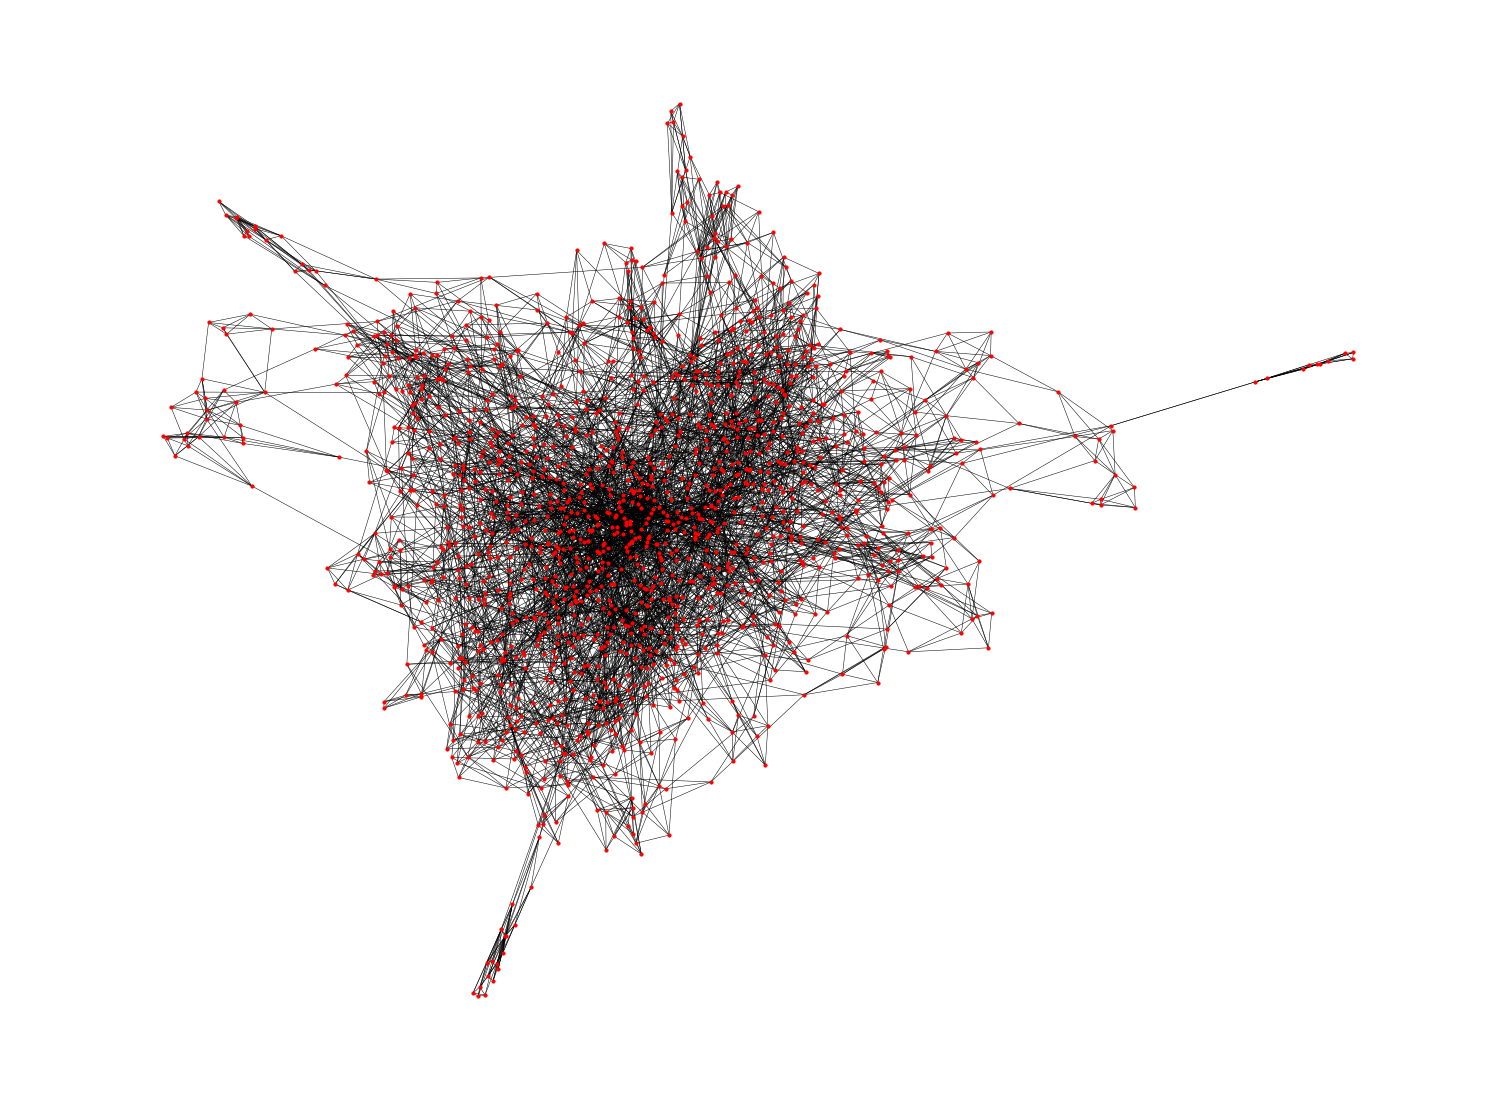

In [5]:
prop = Property(G)
prop.visualize()

## Graph properties

#### Degree distribution

Max degree: 38


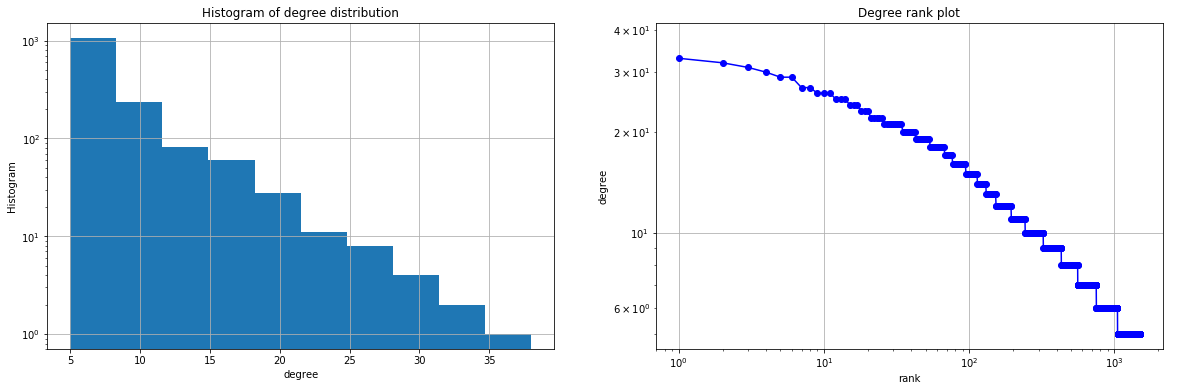

In [7]:
prop = Property(G)
degree = prop.degree_dist()

#### Nodes with largest degree

In [9]:
list_degree = list(dict(nx.degree(G)).values())
first_n = 10
index_ = np.asarray(list_degree).argsort()[-first_n:][::-1]

dict_label = {}
for i in index_:
    print(str(label[i]) + ' ' + str(nx.degree(G)[i]))
    dict_label[label[i]] = nx.degree(G)[i]

basis 38
result 33
residing 32
fact 31
example 30
makeup 29
nonfamilies 29
males 27
addition 27
race 26


#### Diameter

In [9]:
prop = Property(G)
diameter = prop.diameter()

Diameter: 13


#### Clustering coefficient

In [10]:
prop = Property(G)
clustering_coef = prop.clustering_coef()

Clustering coefficient: 0.318155307995


#### Community detection

Modularity: 0.667340292715
Number of communities: 38


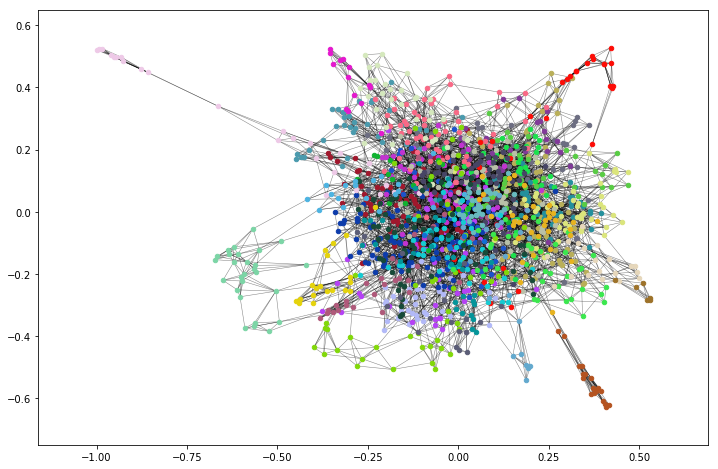

In [5]:
prop = Property(G)
partition = prop.community(resolution=0.5)

##### Visualization of one certain community

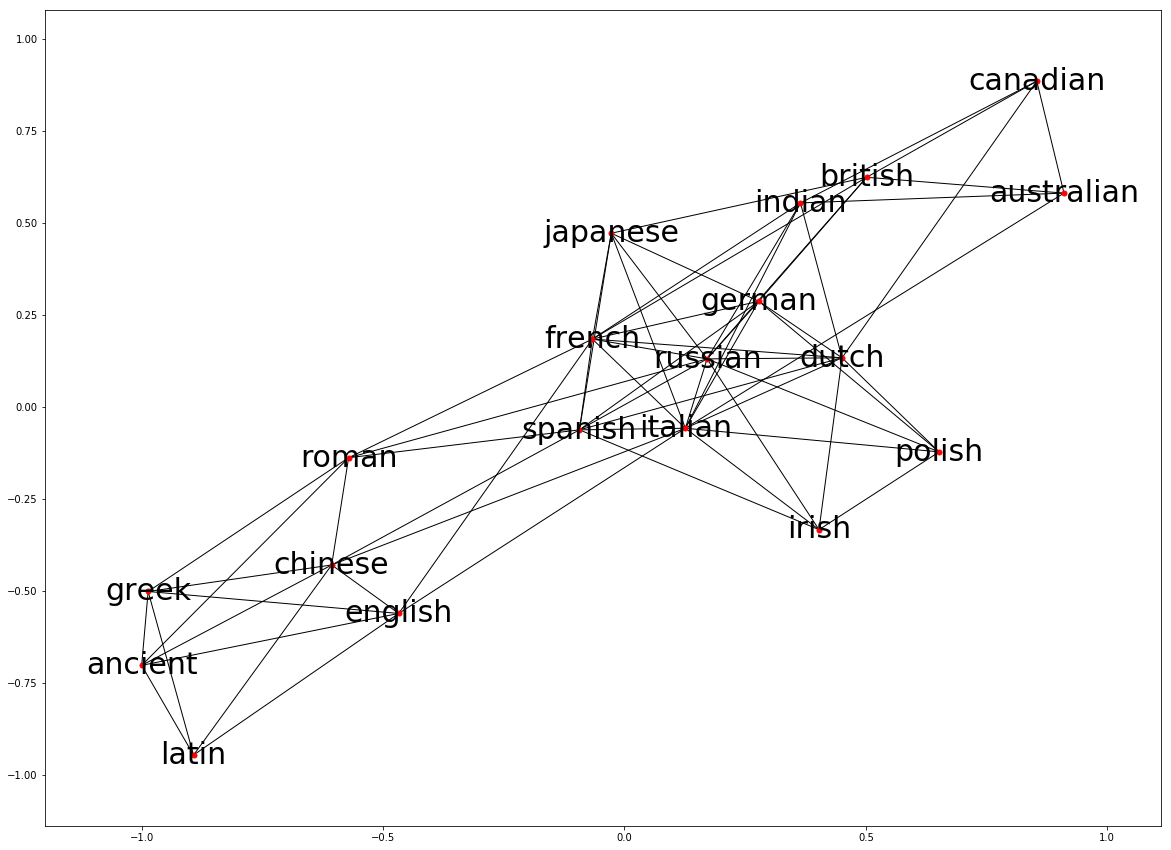

In [10]:
## Instance: visulize the 19th community in the partitioning.

list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == 19]
community = G.subgraph(list_nodes)
pos = nx.spring_layout(community)
plt.figure(figsize=(20,15))
options = {'node_color': 'red',
           'node_size': 25,
           'width': 1,
           'labels':  {i:label.words[i] for i in list_nodes},
           'font_size': 30}

nx.draw_networkx(community, **options)
plt.show()

#### Visualization of rng tree with customized root word

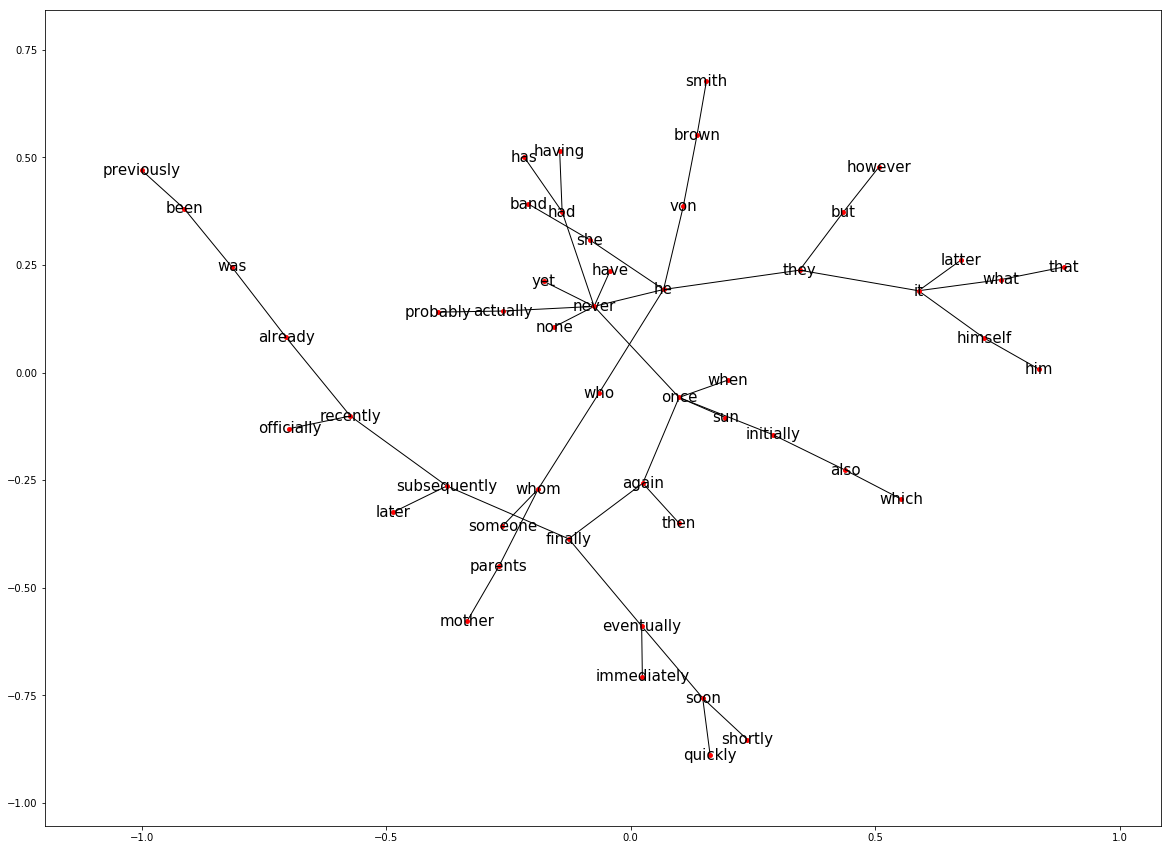

In [5]:
prop = Property(G)
prop.rn_tree(nodes, label, root = 0, k_neig = 50)